# День 01 – Дескриптивный и разведочный анализ данных

Время познакомиться с данными получше. Когда начинаешь дескриптивный и разведочный анализ, никогда не знаешь, что найдешь. И найдешь ли что-то интересное вообще? Посмотрим, удастся ли нам найти какие-то интересные инсайты на этом этапе анализа данных.

В начале импортируй библиотеки, которые понадобяться нам в работе.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt;

Если ячейка выше у нас **не запускается**, то скорее всего у нас **не установлена какая-либо библиотека**.  **Чтобы установить библиотеку напиши**:
`pip install matplotlib` или `pip install seaborn` или `pip install pandas`

## Загрузка данных

Сегодня мы проведем дескриптивный анализ наших данных. Прежде, чем приступать к дескриптивному анализу, необходимо понять, с какими данными мы имеем дело, и заблаговременно принять меры по изменению или доработке данных.

Загрузим наши данные

In [2]:
dataset_01_06 = pd.read_csv("../../data/v2/day01/dataset_01_06.csv")
dataset_07_12 = pd.read_csv("../../data/v2/day01/dataset_07_12.csv")

Атрибут `.shape` выведет разметы датасета: (Количество строк, Количество столбцов)

In [3]:
dataset_01_06.shape

(32092, 3648)

In [4]:
dataset_07_12.shape

(34661, 3648)

## Добавление нового признака

Для удобства проведения EDA давай объединим 2 датасета, но перед эти добавим признак `period`.

In [5]:
dataset_01_06["period"] = "1 полугодие"
dataset_07_12["period"] = "2 полугодие"

In [6]:
dataset_01_06["period"].head(5)

0    1 полугодие
1    1 полугодие
2    1 полугодие
3    1 полугодие
4    1 полугодие
Name: period, dtype: object

## Задание 1

Объедини датасеты `dataset_01_06` и `dataset_07_12` в один под названием `dataset`. \
Выведи размеры получившегося датасета.

In [7]:
dataset = pd.concat([dataset_01_06, dataset_07_12])

In [8]:
dataset.shape

(66753, 3649)

## Сбросить индекс

Так как ты объединили 2 датасета, то у нас могут дублироваться индексы строк. Поэтому для удобства воспользуемся методом `reset_index` для того, чтобы спросить индексы строк.

In [9]:
dataset = dataset.reset_index()

## Фильтрация

Так как у нас данные за два полугодия, то в нашем датасете могут оказаться данные по одному и тому же пользователю. Например выберем пользователя с `id` 34657. Для этого отфильруем данные с помощью следующей конструкции:

`dataset['условие по выбору строк']`

In [10]:
# Выберем из датасета только те строки, которые удовлетволяют условию client_id = 34657
dataset[dataset["client_id"] == 34657] 

index  prepay_ind_p1m  latitude_1m  building_type_key_1m  \
30289  30289             0.0    51.704804           377945938.0   

       deferred_pay_1m  pay_count_p3m  crm_init_count_d1m  crm_out_count_p3m  \
30289              NaN            3.0                 0.0                0.0   

       prepay_ind_d2m  basic_day_debt_bad_max_d1m  ...  is_multiscreen_p1m  \
30289             0.0                         0.0  ...                 0.0   

       avg_view_other_p1m  count_purchase_1m  avg_view_multi_1m  \
30289                 0.0                0.0              13.18   

       total_duration_1m  avg_view_adult_1m  avg_view_category_18_d3m  \
30289             674.43                0.0                       0.0   

       avg_view_tvmarket_p2m  avg_view_category_0_2m       period  
30289                    0.0                     0.0  1 полугодие  

[1 rows x 3650 columns]

## Задание 2

Пока у нас нет задачи изучить наших клиентов "в динамике", мы просто хотим описать нашего клиента. 
Давай создадим переменную `dataset_unique`. В нее сохраним **последние** данные об **уникальных** клиентах. 
В этом тебе поможет метод [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) 
и его параметр `keep`.

Выведи количество строк получившегося датасета. Для того чтобы убедиться, что ты все выполнил верно, 
выполни код `assert len(dataset_unique) == 60699`. Он должен выполниться без ошибок.

In [11]:
dataset_unique = dataset.drop_duplicates("client_id", keep="last")

In [12]:
len(dataset_unique)

60699

In [13]:
assert len(dataset_unique) == 60699

## Подсчет количества значений

Чтобы подсчитать **количество значений у признака**: 
Сначала в квадратных скобочках выберите признак, который вас интересует. Например, `['gender_1m']` - признак пола клиента. А затем воспользуйтесь методом `.value_counts()`

In [14]:
dataset_unique['gender_1m'].value_counts()

gender_1m
2.0    30924
1.0    27447
0.0       42
Name: count, dtype: int64

В файле `attributes.xlsx` сказано:
> 0 - Неизвестно, 1 -
> Мужской, 2 - Женский

## Отрисовка графиков

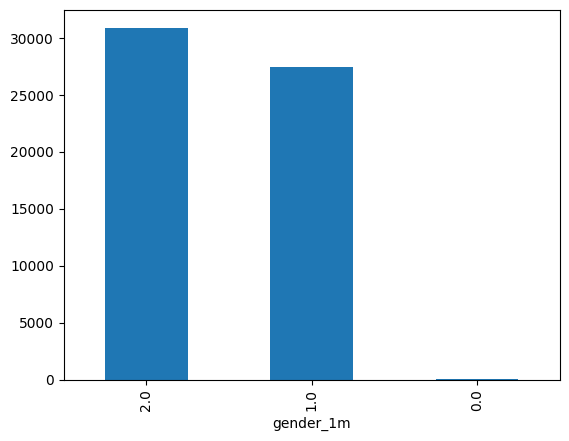

In [15]:
dataset_unique['gender_1m'].value_counts().plot.bar();

**Чтобы нарисовать график**, используя метод `.plot` и соответствующее название графика. Для того, чтобы отрисовать стобцовую диаграмму допишите `.bar()`

## Задание 3

Построй круговую диаграмму [pie-plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html) 
по количеству ушедших клиентов. За отток клиента отвечает признак `label`.
Для того чтобы красиво дополнить график, добавь эти аргументы `autopct='%1.1f%%', legend=True, title='Ушедшие 
пользователи', ylabel=''`, в метод `pie()`. 

Какой процент пользователей отказались от наших услуг?

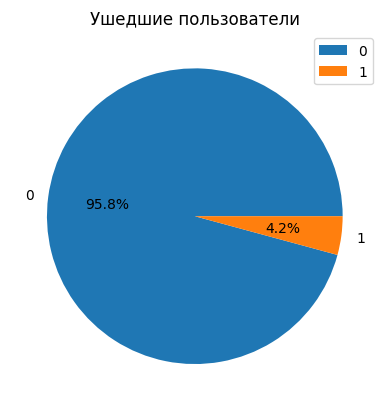

In [16]:
dataset_unique['label'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    legend=True, 
    title='Ушедшие пользователи',
    ylabel='',
);

## Задание 4

Первая гипотеза, которую все хотят проверить - если клиент часто обращается в поддержку, 
то ему что-то не нравится и возможно он собирается отказаться от наших услуг (хотя на самом деле, часто все наоборот). 

C помощью функции [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) построй график "ящик с усами" 
по количеству обращений клиента **за 3 месяца** по ушедшим и оставшимся клиентам. В этом тебе поможет аргумент `hue`.

Отличается ли медиана количества обращений у ушедших и оставшихся клиентов?

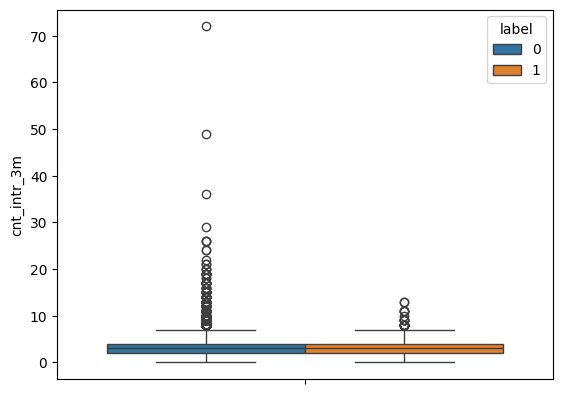

In [17]:
sns.boxplot(data=dataset_unique, y="cnt_intr_3m", hue="label");

# Задание 5

У нас имеются данные баланса клиента. Данные баланса клиента **за 3 месяца** собраны в колонке `balance_sum_3m`. 
Интересно посмотреть сколько в среднем клиент держат на счетах. 

C помощью функции диаграмму [hist-plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html) 
построй гистограмму баланса пользователей. Для функции `hist` используй аргумент `bins=200`. 

Также рассчитай среднее и медиану для колонки `balance_sum_3m`. Сохрани их в переменные `mean` и `median`. 
С помощью функции `plt.axvline` добавь эти статистики на гистограмму.

In [18]:
mean = dataset_unique['balance_sum_3m'].mean()
mean

3061.4037285622494

In [19]:
median = dataset_unique['balance_sum_3m'].median()
median

2323.45

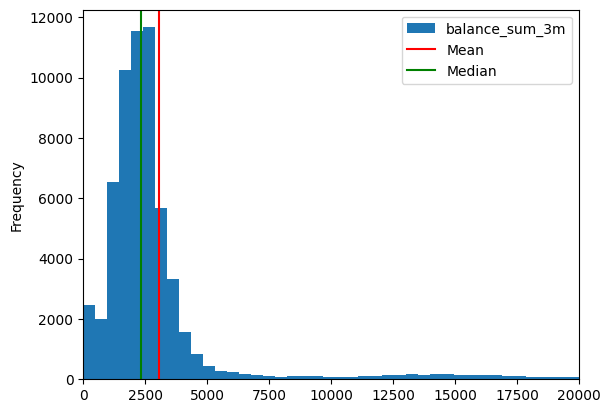

In [20]:
dataset_unique['balance_sum_3m'].plot.hist(bins=200)
plt.axvline(x=mean, color='r', label='Mean')
plt.axvline(x=median, color='g', label='Median')
plt.xlim([0, 20000]) # Ограничение оси Х от 0 до 20.000
plt.legend();

## Сводная таблица

Теперь было бы интересно посмотреть изменение количества ушедших/оставшихся пользователей. В этом нам помогут сводные таблицы.
Воспользуемся функцией `pd.pivot_table`

In [21]:
table = pd.pivot_table(
    dataset,  # Указываем нашу таблицу
    values='client_id',  # Указываем значение по которому будем осуществлять сводку. В данном случае это уникальный id клиента
    index='period', # Индекс таблицы
    columns='label',  # Колонки таблицы
    aggfunc='count' # Какую функцию будет применять к values.
)

In [22]:
table

label            0     1
period                  
1 полугодие  30950  1142
2 полугодие  33235  1426

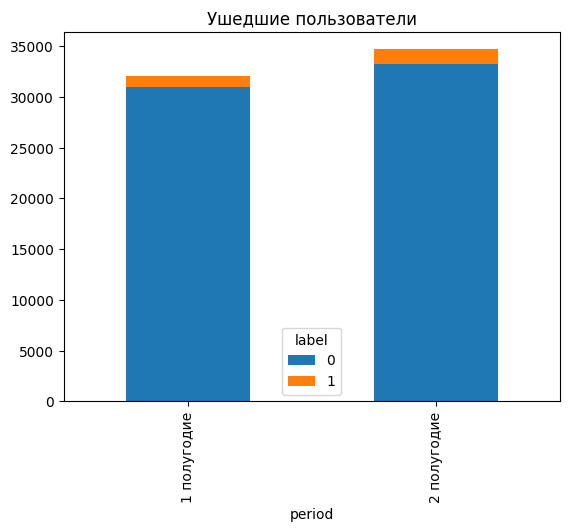

In [23]:
table.plot.bar(legend=True, title='Ушедшие пользователи', stacked=True);

## Задание 6

А какую статистику о клиенте хотел бы про визуализировать ты? Надеюсь, за предыдущие задания у тебя уже появились 
гипотезы, которые бы ты хотел визуализировать.

Используя инструменты, с которыми ты познакомился ранее, визуализируй статистики, которые тебе интересны. 
Чем больше, тем лучше)


In [24]:
# Код тут

## Задание 7

Используя библиотеку [Plotly и функции Density Heatmap](https://plotly.com/python/mapbox-density-heatmaps/) отрисуй тепловую карту клиентов. 
За маркер используй **время жизни клиента**

In [25]:
import plotly.graph_objects as go

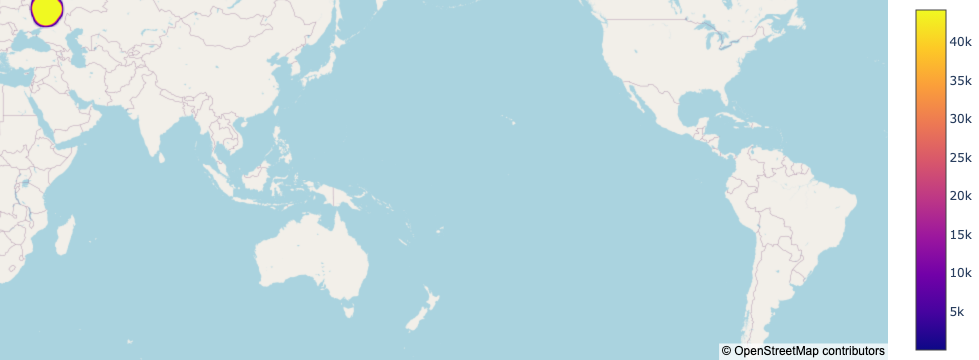

In [26]:
fig = go.Figure(
    go.Densitymapbox(
        lat=dataset["latitude_1m"], 
        lon=dataset["longitude_1m"], 
        z=dataset["lifetime_1m"],
    radius=10)
)
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()